In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer=load_breast_cancer()

In [3]:
features=pd.DataFrame(cancer.data,columns=cancer.feature_names)
target=pd.DataFrame(cancer.target,columns=['target'])

In [4]:
data=pd.concat([features,target],axis=1)

In [5]:
k=np.sqrt(len(data))
k

23.853720883753127

In [6]:
correlation=data.corr('pearson')

In [7]:
correlation['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [8]:
features=(features-features.min())/(features.max()-features.min())

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.3)

In [10]:
f1='worst concave points'
f2='worst perimeter'

basex=np.array(xtrain[[f1,f2]])
basey=np.array(ytrain['target'])

testx=np.array(xtest[[f1,f2]])
testy=np.array(ytest['target'])

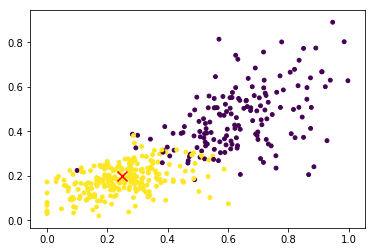

In [11]:
x=pd.DataFrame(basex)
y=basey

plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [12]:
def euclidean_distance(train_point,test_point):
    distance=np.sum((train_point-test_point)**2)
    
    return np.sqrt(distance)

In [13]:
def calc_distance_from_all(all_points,given_point,predictions):
    all_distances=[]
    
    for i,each in enumerate(all_points):
        distance=euclidean_distance(each,given_point)
        all_distances.append((distance,int(predictions[i])))
        
    all_distances.sort(key=lambda tup: tup[0])
    
    return all_distances

In [14]:
def get_neighbours(distances,count):
    return distances[:count]

In [15]:
def predict(all_points,given_point,predictions):
    distances=calc_distance_from_all(all_points,given_point,predictions)
    neighbours=get_neighbours(distances,23)
    
    op=[row[-1] for row in neighbours]
    prediction=max(set(op),key=op.count)
    return prediction

In [20]:
def accuracy(basex,basey,testx,testy):
    correct=0
    
    for i in range(len(testx)):
        p=predict(basex,testx[i],basey)
        
        if p==testy[i]:
            correct+=1
#             if p>0.5:
#                 z=1
#                 print("malignant")
#             else:
#                 z=0
#                 print("benign")
            
            
    return f"Accuracy:{correct*100/len(testy)}"

In [21]:
accuracy(basex,basey,testx,testy)

'Accuracy:92.39766081871345'

In [22]:
#three feature prediction of breast cancer using KNN

f1='worst concave points'
f2='worst perimeter'
f3='mean concave points'

basex1=np.array(xtrain[[f1,f2,f3]])
basey1=np.array(ytrain['target'])

testx1=np.array(xtest[[f1,f2,f3]])
testy1=np.array(ytest['target'])

In [23]:
accuracy(basex1,basey1,testx1,testy1)

'Accuracy:92.39766081871345'